In [46]:
# Import useful libraries for analysis
import numpy as np
from matplotlib import pyplot as plt

from SignalCalculator import SignalCalculator

plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = (9,8)



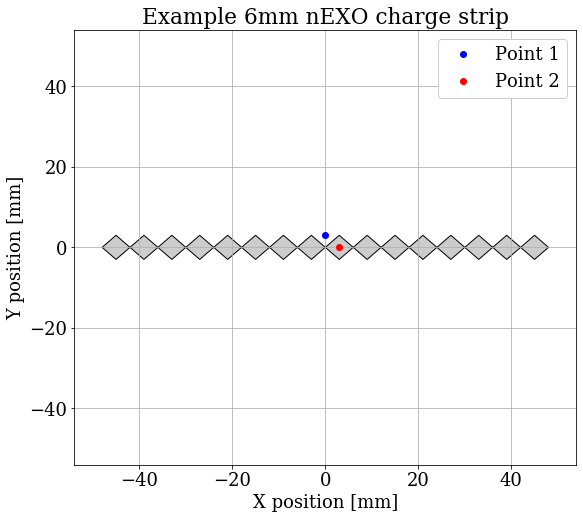

In [47]:
SignalCalculator.DrawStrip()

pt1 = (0., 3., 300.) # (x,y,z) coordinates of ionization event, given in mm
pt2 = (3., 0., 300.) # (x,y,z) coordinates of ionization event, given in mm

plt.plot(pt1[0],pt1[1],'ob',label='Point 1')
plt.plot(pt2[0],pt2[1],'or',label='Point 2')
plt.xlabel('X position [mm]')
plt.ylabel('Y position [mm]')
plt.title('Example 6mm nEXO charge strip')
plt.grid()
plt.legend(framealpha=1.)


(0.0, 1.05)

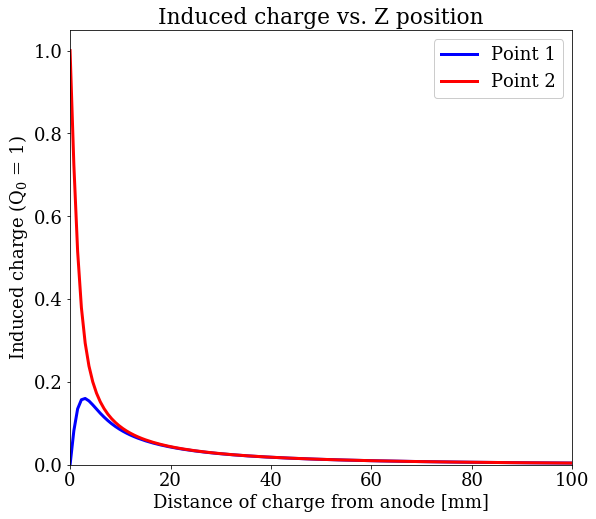

In [48]:
Q = 1. # Assume a unit charge

n_zsteps = 400

pt1_z_steps = np.linspace( 0., pt1[2], n_zsteps)
pt2_z_steps = np.linspace( 0., pt2[2], n_zsteps)

pt1_charge_vs_z = np.zeros(n_zsteps)
pt2_charge_vs_z = np.zeros(n_zsteps)


for i in range(n_zsteps):
    
    pt1_charge_vs_z[i] = SignalCalculator.InducedChargeNEXOStrip( 1., \
                                                                    pt1[0], pt1[1], \
                                                                    pt1_z_steps[i], \
                                                                    padSize=6.)
    pt2_charge_vs_z[i] = SignalCalculator.InducedChargeNEXOStrip( 1., \
                                                                    pt2[0], pt2[1], \
                                                                    pt2_z_steps[i], \
                                                                    padSize=6.)


plt.plot(pt1_z_steps,pt1_charge_vs_z,'-b',linewidth=3,label='Point 1')
plt.plot(pt2_z_steps,pt2_charge_vs_z,'-r',linewidth=3,label='Point 2')

plt.xlabel('Distance of charge from anode [mm]')
plt.ylabel(r'Induced charge (Q$_0$ = 1)')
plt.title('Induced charge vs. Z position')
plt.legend(framealpha=1.)
plt.xlim(0.,100.)
plt.ylim(0.0,1.05)


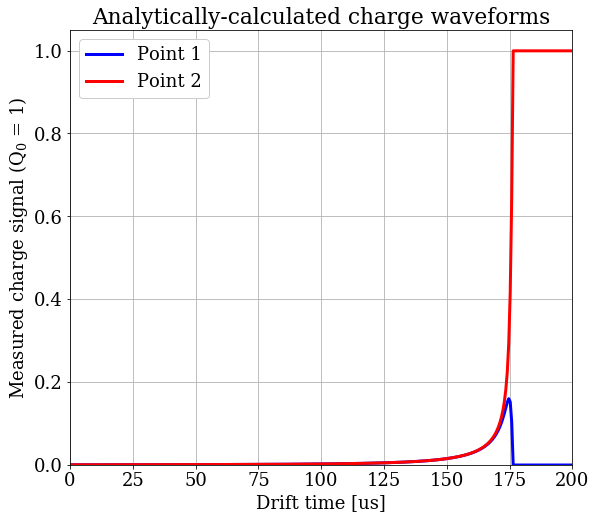

In [53]:
plt.title('Analytically-calculated charge waveforms')

pt1_drift_points, pt1_charge_wfm = SignalCalculator.ComputeChargeWaveformOnStripWithIons( \
                                                    Q, pt1[0], pt1[1], pt1[2], \
                                                    padSize=6., numPads=16 )
pt2_drift_points, pt2_charge_wfm = SignalCalculator.ComputeChargeWaveformOnStripWithIons( \
                                                    Q, pt2[0], pt2[1], pt2[2], \
                                                    padSize=6., numPads=16 )

# Add an extra point on the end to force the charge signal to stay at the 
# amount of collected charge after the collection takes place
pt1_drift_points = np.append( pt1_drift_points, 200.)
pt2_drift_points = np.append( pt2_drift_points, 200.)

pt1_charge_wfm = np.append( pt1_charge_wfm, pt1_charge_wfm[-1])
pt2_charge_wfm = np.append( pt2_charge_wfm, pt2_charge_wfm[-1])


# Plot the waveforms
plt.plot(pt1_drift_points,pt1_charge_wfm,'-b',linewidth=3,label='Point 1')
plt.plot(pt2_drift_points,pt2_charge_wfm,'-r',linewidth=3,label='Point 2')

plt.xlabel('Drift time [us]')
plt.ylabel(r'Measured charge signal (Q$_0$ = 1)')

plt.xlim(0.,200.)
plt.ylim(0.,1.05)

plt.legend(framealpha=1.)
plt.grid()


    

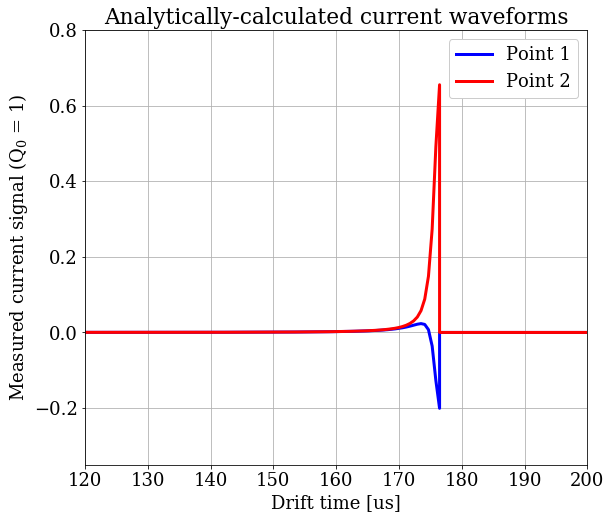

In [54]:
plt.title('Analytically-calculated current waveforms')

pt1_drift_points, pt1_current_wfm = SignalCalculator.ComputeCurrentWaveformOnStrip( \
                                                    Q, pt1[0], pt1[1], pt1[2], \
                                                    padSize=6., numPads=16 )
pt2_drift_points, pt2_current_wfm = SignalCalculator.ComputeCurrentWaveformOnStrip( \
                                                    Q, pt2[0], pt2[1], pt2[2], \
                                                    padSize=6., numPads=16 )

# Add extra points on the end to force the current to go to 0 after
# the charge gets collected.
pt1_drift_points = np.append( pt1_drift_points, pt1_drift_points[-1])
pt2_drift_points = np.append( pt2_drift_points, pt2_drift_points[-1])

pt1_drift_points = np.append( pt1_drift_points, 200.)
pt2_drift_points = np.append( pt2_drift_points, 200.)

pt1_current_wfm = np.append( pt1_current_wfm, [0., 0.])
pt2_current_wfm = np.append( pt2_current_wfm, [0., 0.])


# Plot the waveforms
plt.plot(pt1_drift_points,pt1_current_wfm,'-b',linewidth=3,label='Point 1')
plt.plot(pt2_drift_points,pt2_current_wfm,'-r',linewidth=3,label='Point 2')

plt.xlabel('Drift time [us]')
plt.ylabel(r'Measured current signal (Q$_0$ = 1)')

plt.xlim(120.,200.)
plt.ylim(-0.35,0.8)
plt.legend(framealpha=1.)
plt.grid()
